# R Nearest Neighbors Classification
> documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame({'Sepal length': iris.data[:,0],
                   'Sepal width': iris.data[:,1],
                   'Petal length':iris.data[:,2],
                   'Petal width':iris.data[:,3],
                   'Species':iris.target})
df.head()

Sepal length  Sepal width  Petal length  Petal width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


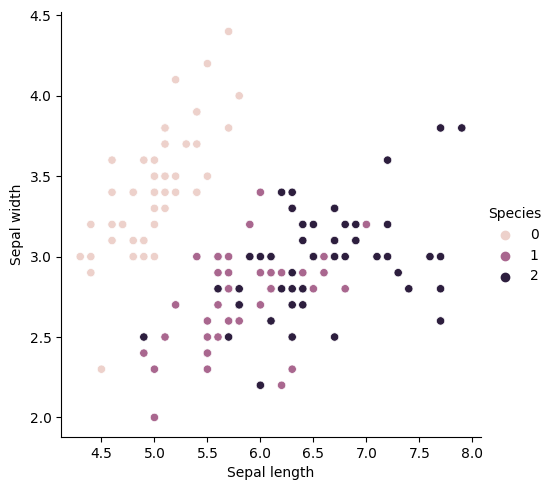

In [5]:
sns.relplot(data = df, x = 'Sepal length', y = 'Sepal width', hue = 'Species')

In [6]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:4]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [7]:
X_train[:5]

Sepal length  Sepal width  Petal length  Petal width
71            6.1          2.8           4.0          1.3
97            6.2          2.9           4.3          1.3
95            5.7          3.0           4.2          1.2
129           7.2          3.0           5.8          1.6
148           6.2          3.4           5.4          2.3

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train[:5]

array([[ 0.3344104 , -0.62374154,  0.16477965,  0.15444797],
       [ 0.46020741, -0.40163773,  0.33475294,  0.15444797],
       [-0.16877766, -0.17953392,  0.27809517,  0.02300289],
       [ 1.71817755, -0.17953392,  1.18461934,  0.54878321],
       [ 0.46020741,  0.70888134,  0.9579883 ,  1.46889877]])

## R-Nearest Neighbors

In [10]:
r = 1

In [11]:
from sklearn.neighbors import RadiusNeighborsClassifier

classifier = RadiusNeighborsClassifier(radius = r)
classifier.fit(X_train, y_train)

RadiusNeighborsClassifier(radius=1)

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


## Best r

In [14]:
def rnn_tuning(r):
  classifier = RadiusNeighborsClassifier(radius = r)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [15]:
rnn_tuning(1)

1.0

In [16]:
rnn_tuning(5)

0.4

In [17]:
rnn_results = pd.DataFrame({'R':np.arange(1, 10, 0.5)})

In [18]:
rnn_results['R']

0     1.0
1     1.5
2     2.0
3     2.5
4     3.0
5     3.5
6     4.0
7     4.5
8     5.0
9     5.5
10    6.0
11    6.5
12    7.0
13    7.5
14    8.0
15    8.5
16    9.0
17    9.5
Name: R, dtype: float64

In [19]:
rnn_results['Accuracy'] = rnn_results['R'].apply(rnn_tuning)
rnn_results['Accuracy']

0     1.000000
1     0.933333
2     0.866667
3     0.900000
4     0.866667
5     0.700000
6     0.600000
7     0.500000
8     0.400000
9     0.366667
10    0.300000
11    0.266667
12    0.266667
13    0.266667
14    0.266667
15    0.266667
16    0.266667
17    0.266667
Name: Accuracy, dtype: float64

In [20]:
rnn_results

R  Accuracy
0   1.0  1.000000
1   1.5  0.933333
2   2.0  0.866667
3   2.5  0.900000
4   3.0  0.866667
5   3.5  0.700000
6   4.0  0.600000
7   4.5  0.500000
8   5.0  0.400000
9   5.5  0.366667
10  6.0  0.300000
11  6.5  0.266667
12  7.0  0.266667
13  7.5  0.266667
14  8.0  0.266667
15  8.5  0.266667
16  9.0  0.266667
17  9.5  0.266667

## Optimize weights

In [21]:
def rnn_tuning_uniform(r):
  classifier = RadiusNeighborsClassifier(radius = r, weights= 'uniform')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [22]:
def rnn_tuning_distance(k):
  classifier = RadiusNeighborsClassifier(radius = k, weights= 'distance')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [23]:
rnn_results['Uniform'] = rnn_results['R'].apply(rnn_tuning_uniform)
rnn_results['Distance'] = rnn_results['R'].apply(rnn_tuning_distance)
rnn_results

R  Accuracy   Uniform  Distance
0   1.0  1.000000  1.000000  1.000000
1   1.5  0.933333  0.933333  0.966667
2   2.0  0.866667  0.866667  1.000000
3   2.5  0.900000  0.900000  1.000000
4   3.0  0.866667  0.866667  0.966667
5   3.5  0.700000  0.700000  0.966667
6   4.0  0.600000  0.600000  0.966667
7   4.5  0.500000  0.500000  0.966667
8   5.0  0.400000  0.400000  0.966667
9   5.5  0.366667  0.366667  0.966667
10  6.0  0.300000  0.300000  0.966667
11  6.5  0.266667  0.266667  0.966667
12  7.0  0.266667  0.266667  0.966667
13  7.5  0.266667  0.266667  0.966667
14  8.0  0.266667  0.266667  0.966667
15  8.5  0.266667  0.266667  0.966667
16  9.0  0.266667  0.266667  0.966667
17  9.5  0.266667  0.266667  0.966667